# Data Preprocessing


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import re
import string

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
# File names 'negative_comments.txt' and 'positive_comments.txt'
negative_file_path = '/content/drive/MyDrive/text_2/pre/neg.txt'
positive_file_path = '/content/drive/MyDrive/text_2/pre/pos.txt'

# Read the negative comment file
with open(negative_file_path, 'r') as file:
    negative_comments = file.readlines()

# Read the positive comment file
with open(positive_file_path, 'r') as file:
    positive_comments = file.readlines()

# The number of negative and positive reviews read
print(f"读取到的负面评论数量: {len(negative_comments)}")
print(f"读取到的正面评论数量: {len(positive_comments)}")


读取到的负面评论数量: 8019
读取到的正面评论数量: 7567


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Text normalization

In [ ]:
def custom_preprocess(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    # tokenization
    words = word_tokenize(text)
    # Create a custom list of stop words
    custom_stop_words = set(stopwords.words('english'))
    # Remove words from the list that are important for sentiment analysis, such as 'not' and 'never'
    custom_stop_words.discard('not')
    custom_stop_words.discard('never')
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    processed_words = [lemmatizer.lemmatize(word) for word in words if word not in custom_stop_words]

    # Reassemble text
    return ' '.join(processed_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
neg_processed = [custom_preprocess(text) for text in negative_comments]
pos_processed = [custom_preprocess(text) for text in positive_comments]

In [ ]:
pos_processed_text = '\n'.join(pos_processed)
neg_processed_text = '\n'.join(neg_processed)
pos_file_path = '/content/drive/MyDrive/text_2/pre/pos_processed_text.txt'
with open(pos_file_path, 'w', encoding='utf-8') as f:
    f.write(pos_processed_text)
neg_file_path = '/content/drive/MyDrive/text_2/pre/neg_processed_text.txt'
with open(neg_file_path, 'w', encoding='utf-8') as f:
    f.write(neg_processed_text)

Use 80% of the original data as the train text file and 20% as the validation text file

In [ ]:
def split_text_file(file_path, split_ratio=0.8):
    # read the file
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    # Computed split point
    split_point = int(len(lines) * split_ratio)
    # Split into two parts, train and validation sets
    train_lines = lines[:split_point]
    test_lines = lines[split_point:]
    return train_lines, test_lines

# call the function
# negative file
neg_train_lines, neg_test_lines = split_text_file(neg_file_path, split_ratio=0.8)

# Write these lines to a new file
train_neg_path = '/content/drive/MyDrive/text_2/pre/train_neg.txt'
with open(train_neg_path, 'w', encoding='utf-8') as train_file:
    train_file.writelines(neg_train_lines)

test_neg_path = '/content/drive/MyDrive/text_2/pre/test_neg.txt'
with open(test_neg_path, 'w', encoding='utf-8') as test_file:
    test_file.writelines(neg_test_lines)

#positive file
pos_train_lines, pos_test_lines = split_text_file(pos_file_path, split_ratio=0.8)

# Write these lines to a new file
train_pos_path = '/content/drive/MyDrive/text_2/pre/train_pos.txt'
with open(train_pos_path, 'w', encoding='utf-8') as train_file:
    train_file.writelines(pos_train_lines)
test_pos_path = '/content/drive/MyDrive/text_2/pre/test_pos.txt'
with open(test_pos_path, 'w', encoding='utf-8') as test_file:
    test_file.writelines(pos_test_lines)


In [ ]:
print(len(pos_train_lines),len(pos_test_lines))
print(len(neg_train_lines),len(neg_test_lines))

6053 1514
6415 1604


In [ ]:
import os

base_dir = '/content/drive/MyDrive/text_2'

neg_file_path = os.path.join(base_dir, 'train', 'neg', 'train_neg.txt')
pos_file_path = os.path.join(base_dir, 'train', 'pos', 'train_pos.txt')

with open(neg_file_path, 'r', encoding='utf-8') as file:
    for i, line in enumerate(file):
        individual_file_path = os.path.join(base_dir, 'train', 'neg', f'neg_{i}.txt')
        with open(individual_file_path, 'w', encoding='utf-8') as individual_file:
            individual_file.write(line)

with open(pos_file_path, 'r', encoding='utf-8') as file:
    for i, line in enumerate(file):
        individual_file_path = os.path.join(base_dir, 'train', 'pos', f'pos_{i}.txt')
        with open(individual_file_path, 'w', encoding='utf-8') as individual_file:
            individual_file.write(line)

In [ ]:
neg_file_path = os.path.join(base_dir, 'val', 'neg', 'val_neg.txt')
pos_file_path = os.path.join(base_dir, 'val', 'pos', 'val_pos.txt')

with open(neg_file_path, 'r', encoding='utf-8') as file:
    for i, line in enumerate(file):
        individual_file_path = os.path.join(base_dir, 'val', 'neg', f'neg_{i}.txt')
        with open(individual_file_path, 'w', encoding='utf-8') as individual_file:
            individual_file.write(line)

with open(pos_file_path, 'r', encoding='utf-8') as file:
    for i, line in enumerate(file):
        individual_file_path = os.path.join(base_dir, 'val', 'pos', f'pos_{i}.txt')
        with open(individual_file_path, 'w', encoding='utf-8') as individual_file:
            individual_file.write(line)

In [ ]:
from tensorflow import keras
import pathlib
batch_size = 64
train_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/text_2/train',
    batch_size=batch_size)
val_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/text_2/val',
    batch_size=batch_size)

Found 12470 files belonging to 2 classes.
Found 3120 files belonging to 2 classes.


Golden Constant are 804.126162965186 and 890.2975822125477, so I use bag-of-words model to predict.

# Bag-of-words model: bag-of-3-grams

3-gram tokenization & indexing

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import tensorflow as tf
max_tokens = 8500
text_vectorization = TextVectorization(
    max_tokens=max_tokens,
    ngrams = 3,
    output_mode='multi_hot')

text_only_train_ds = train_ds.map(lambda x, y: x)
text_vectorization.adapt(text_only_train_ds)

binary_3gram_train_ds = train_ds.map(lambda x, y: (text_vectorization(x), y), num_parallel_calls=4)
binary_3gram_val_ds = val_ds.map(lambda x, y: (text_vectorization(x), y), num_parallel_calls=4)

In [ ]:
!pip install keras-tuner
import kerastuner as kt
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import tensorflow as tf

# Model building & hyperparameters tuning

In [ ]:
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.Input(shape=(max_tokens,)))
    # Hyperparameter: The number of Dense layers and Dropout layers
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(layers.Dense(
            hp.Int('units_' + str(i), min_value=16, max_value=128, step=16),
            activation=hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'])
        ))
        model.add(layers.Dropout(hp.Float('dropout_' + str(i), min_value=0.1, max_value=0.5, step=0.1)))

    model.add(layers.Dense(1, activation='sigmoid'))

    # Hyperparameters tunning： learning rate
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')

    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
tuner = kt.RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=50,
    executions_per_trial=1,
    directory='my_dir',
    project_name='random_search_1947'
)
batch_size = 32
epochs = 10
tuner.search(binary_3gram_train_ds.cache(), epochs=epochs, validation_data=binary_3gram_val_ds.cache(), batch_size=batch_size)

Trial 50 Complete [00h 00m 25s]
val_accuracy: 0.5144230723381042

Best val_accuracy So Far: 0.8788461685180664
Total elapsed time: 00h 28m 38s


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 48)                408048    
                                                                 
 dropout_8 (Dropout)         (None, 48)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                1568      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 409649 (1.56 MB)
Trainable params: 409649 (1.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
最佳模型的超参数：
层数：2
每层单

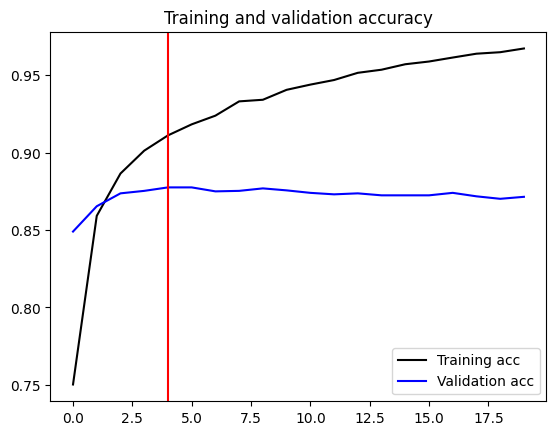

<Figure size 640x480 with 0 Axes>

In [ ]:
#search
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model_search = model_builder(best_hps)
model_search.summary()
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Hyperparameters of the optimal model：")
print(f"number of layers：{best_hyperparameters.get('num_layers')}")
print(f"Number of units per layer：{[best_hyperparameters.get('units_' + str(i)) for i in range(best_hyperparameters.get('num_layers'))]}")
print(f"activation function per layer：{[best_hyperparameters.get('activation') for i in range(best_hyperparameters.get('num_layers'))]}")
print(f"dropout rate per layer：{[best_hyperparameters.get('dropout_' + str(i)) for i in range(best_hyperparameters.get('num_layers'))]}")
print(f"learning rate: {best_hyperparameters.get('learning_rate')}")
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath='binary_t_1gram.keras',save_best_only=True,)]
batch_size = 32
epochs = 20
history = model_search.fit(binary_3gram_train_ds.cache(), validation_data=binary_3gram_val_ds.cache(), batch_size=batch_size, epochs=epochs, callbacks=callbacks)
model_search = keras.models.load_model('binary_t_1gram.keras')
print(f"Test acc: {model_search.evaluate(binary_3gram_val_ds)[1]:.3f}")
plotEpoch( history.history )

# Apply the model to the test text data, make the prediction

In [ ]:
from tensorflow.keras.models import load_model
model_search = keras.models.load_model('binary_t_1gram.keras')

NameError: name 'keras' is not defined

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/text/customertweets.csv', header = None)

print(df.head())

    0                                                  1
0   6  My 8:50 flight to Dallas has been delayed to 1...
1   7  @suzij77 @united @jimjefferies @Delta Oh that ...
2   8  @ArianFoster I hate @united 2. They didn't let...
3   9  I'm so upset with @AmericanAir They changed my...
4  10  Slightly delayed flight home from Philly. but ...


In [ ]:
# Apply the preprocessing function
df[1] = df[1].apply(custom_preprocess)

# Check the first few entries of the processed text
print(df[1].head())

0    8:50 flight dallas delayed 10:40. 'm not surpr...
1    oh suck . deep breath though . n't take people...
2    hate 2. n't let flight 2 week ago 3min gate cl...
3    'm upset changed boyfriend flight . n't get ti...
4    slightly delayed flight home philly . least 's...
Name: 1, dtype: object


In [ ]:
text_input = text_vectorization(df[1].values)
predictions = model_search.predict(text_input)
print(predictions)

NameError: name 'text_vectorization' is not defined

In [ ]:
raw = pd.read_csv('/content/drive/MyDrive/text/customertweets.csv', header = None)

In [ ]:
results_df = pd.DataFrame({
    'text': df[1],  # raw data
    'prediction': predictions.flatten()  # Model prediction result
})

positive_comments = results_df[results_df['prediction'] > 0.5]

sorted_positive_comments = positive_comments.sort_values(by='prediction', ascending=False)
final_positive_comments = raw.loc[sorted_positive_comments.index]

In [ ]:
sorted_positive_comments.to_csv('test_comments——2029.csv', index=True, header=False)
final_positive_comments.to_csv('test_comments——2029-final.csv', index=True, header=False)